# Imports

In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()
from pandas_profiling import ProfileReport

In [2]:
conn = sqlite3.connect("data\data_wildfire_usa.sqlite")

# conn = sqlite3.connect('FPA_FOD_20170508.sqlite') ---> j'ai utilisé cette ligne car l'emplacement du fichier dans mon PC n'est pas le même

In [3]:
#fires = pd.read_sql_query("SELECT * FROM fires". conn)

fires est un tableau comprenant des données sur les incendies de forêt pour la période 1992-2015 compilées à partir des systèmes de déclaration fédéraux, étatiques et locaux des États-Unis.

In [4]:
#fires.info()

In [5]:
#fires.head()

# Description des variables

1.   OBJECTID : ID : donnée a priori non nécessaire pour notre étude

2.   FOD_ID : Identificateur unique global qui ressemble à l'OBJECTID 

3.   FPA_ID : Identificateur unique nécessaires pour remonter jusqu'à l'enregistrement d'origine 

4.   SOURCE_SYSTEM_TYPE : Type de données source ou système d'où provient l'enregistrement (fédéral, non fédéral ou interagence) 

5.   SOURCE_SYSTEM : Nom ou autre identifiant de la données source ou système d'où provient l'enregistrement 

6.   NWCG_REPORTING_AGENCY : Active National Wildlife Coordinating Group = Groupe national de coordination de la faune. Identifiant d'unité pour l'agence qui prépare le rapport d'incendie.
  *   BIA = Bureau of Indian Affairs 
  *   BLM = Bureau of Land Management
  *   BOR = Bureau of Reclamation
  *   DOD = Department of Defense
  *   DOE = Department of Energy
  *   FS = Forest Service
  *   FWS = Fish and Wildlife Service
  *   IA = Interagency Organization
  *   NPS = National Park Service
  *   ST/C&L = State, County, or Local Organization
  *   TRIBE = Tribal Organization

7.   NWCG_REPORTING_UNIT_ID : Identifiant d'unité NWCG actif pour l'unité préparant le rapport d'incendie 

8.   NWCG_REPORTING_UNIT_NAME : Nom d'unité NWCG actif pour l'unité préparant le rapport d'incendie

9.   SOURCE_REPORTING_UNIT : Code de l'unité d'agence préparant le rapport d'incendie, basé sur le code/nom dans les données source 

10.  SOURCE_REPORTING_UNIT_NAME : Nom de l'unité de l'agence déclarante préparant le rapport d'incendie, basé sur le code/nom des données source 

11.  LOCAL_FIRE_REPORT_ID : Numéro ou code qui identifie de manière unique un rapport d'incident pour une unité de déclaration particulière et une année civile particulière 

12.  LOCAL_INCIDENT_ID : Numéro ou code qui identifie de manière unique un incident pour une organisation locale de gestion des incendies particulière au cours d'une année civile donnée 

13.  FIRE_CODE : code utilisé au sein de la communauté inter-agences des feux de forêt pour suivre et compiler les informations sur les coûts de la suppression des incendies d'urgence

14.  FIRE_NAME : Nom de l'incident, tiré du rapport d'incendie (primaire) ou du rapport ICS-209 (secondaire)

15.  ICS_209_INCIDENT_NUMBER : Identifiant d'incident (événement), issu du rapport ICS-209. 

16.  ICS_209_NAME : Nom de l'incident, tiré du rapport ICS-209. 

17.  MTBS_ID : Identifiant d'incident, à partir de l'ensemble de données de périmètre MTBS. 

18.  MTBS_FIRE_NAME : Nom de l'incident, issu de l'ensemble de données de périmètre MTBS. 

19.  COMPLEX_NAME : Nom du complexe sous lequel l'incendie a finalement été maîtrisé, lorsqu'il est discernable. 

20.  FIRE_YEAR : Année civile au cours de laquelle l'incendie a été découvert ou confirmé. 

21.  DISCOVERY_DATE : Date à laquelle l'incendie a été découvert ou confirmé. 

22.  DISCOVERY_DOY : Jour de l'année où l'incendie a été découvert ou confirmé. 

23.  DISCOVERY_TIME : Heure de la journée à laquelle l'incendie a été découvert ou confirmé. 
            
24.  STAT_CAUSE_CODE : Code de la cause (statistique) de l'incendie.

25.  STAT_CAUSE_DESCR : Description de la cause (statistique) de l'incendie. 

26.  CONT_DATE : Date à laquelle l'incendie a été déclaré maîtrisé ou autrement maîtrisé (mm/jj/aaaa où mm=mois, jj=jour et aaaa=année). 

27.  CONT_DOY : Jour de l'année où l'incendie a été déclaré maîtrisé ou autrement maîtrisé. 

28.  CONT_TIME : Heure de la journée à laquelle l'incendie a été déclaré maîtrisé ou maîtrisé (hhmm où hh=heure, mm=minutes). *

29.  FIRE_SIZE : Estimation des acres dans le périmètre final du feu. (1 acre anglo-saxon = 40,47 ares). 

30.  FIRE_SIZE_CLASS : Code de la taille du feu basé sur le nombre d'acres dans les dépenses finales du périmètre d'incendie
  *   A = > 0 et <= 0,25 acre
  *   B = 0,26 à 9,9 acres
  *   C = 10,0 à 99,9 acres
  *   D = 100 à 299 acres
  *   E = 300 à 999 acres
  *   F = 1000 à 4999 acres
  *   G = 5000+ acres

31.  LATITUDE : Latitude (NAD83) pour l'emplacement ponctuel de l'incendie (degrés décimaux). 

32.  LONGITUDE : Longitude (NAD83) pour l'emplacement ponctuel de l'incendie (degrés décimaux). 

33.  OWNER_CODE : Code du propriétaire principal ou de l'entité responsable de la gestion du terrain au point d'origine de l'incendie au moment de l'incident.

34.  OWNER_DESCR : Nom du propriétaire principal ou de l'entité responsable de la gestion du terrain au point d'origine de l'incendie au moment de l'incident

35.  STATE : Code alphabétique à deux lettres de l'état dans lequel l'incendie a brûlé (ou s'est déclaré), basé sur la désignation nominale dans le rapport d'incendie. 

(AK=Alaska, AL=Alabama, AR=Arkansas, AZ=Arizona, CA=California, CO=Colorado, CT=Connecticut, DE=Delaware, DHS=Department of Homeland Security, DOC= Department of Commerce, DOD=Department of Defense, DOE=Department of Energy, DOI= Department of Interior, DOL=Department of Labor, FL=Florida, GA=Georgia, IA=Iowa, IA/GC=Non-Departmental Agencies, ID=Idaho, IL=Illinois, IN=Indiana, KS=Kansas, KY=Kentucky, LA=Louisiana, MA=Massachusetts, MD=Maryland, ME=Maine, MI=Michigan, MN=Minnesota, MO=Missouri, MS=Mississippi, MT=Montana, NC=North Carolina, NE=Nebraska, NG=Non-Government, NH=New Hampshire, NJ=New Jersey, NM=New Mexico, NV=Nevada, NY=New York, OH=Ohio, OK=Oklahoma, OR=Oregon, PA=Pennsylvania, PR=Puerto Rico, RI=Rhode Island, SC=South Carolina, SD=South Dakota, ST/L=State or Local Government, TN=Tennessee, Tribe=Tribe, TX=Texas, USDA=Department of Agriculture, UT=Utah, VA=Virginia, VI=U. S. Virgin Islands, VT=Vermont, WA=Washington, WI=Wisconsin, WV=West Virginia, WY=Wyoming).

36.  COUNTY : Comté, ou équivalent, dans lequel l'incendie s'est déclaré (ou a pris naissance), en fonction de la désignation nominale dans le rapport d'incendie.

37.  FIPS_CODE : Code à trois chiffres de la publication FIPS (Federal Information Process Standards) 6-4 pour la représentation des comtés et des entités équivalentes.

38.  FIPS_NAME : Nom du comté de la publication FIPS 6-4 pour la représentation des comtés et des entités équivalentes

39.  Shape : donnée inutile

# Statistiques

In [6]:
# Statistiques au format html
#prof = ProfileReport(fires)
#prof.to_file(output_file='rapport.html')

In [7]:
# Affichage des statistiques dans le notebook via la librairie pandas_profiling
#profile = ProfileReport(fires, title='Analyse du fichier WildFire', html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

Suite à la méthode ProfileReport, nous pouvons déclarer :
- Sur 39 entrées : 14 sont des variables de tyme numérique, 24 de type catégorielle et 1 ne peut être exploitée
- Il y a 27% de valeurs manquantes dans le DataFrame
- Etant donné la part de valeurs manquantes dans les colonnes ICS_209_INCIDENT_NUMBER (98.6%), ICS_209_NAME (98.6%), MTBS_ID (99.4%), MTBS_FIRE_NAME (99.4%), COMPLEX_NAME (99.7%), ces colonnes ne seront pas utilisées pour l'étude.
- Il n'y a pas de doubons parfaits : les doublons seront à analyser en détail par colonne
- Certaines colonnes sont à haute cardinalité, c'est à dire qu'elles ont des contraintes (uniques) qui nous empêchent de les regrouper. 
- Les colonnes OBJECTID, FOD_ID et FPA_ID ont des valeurs uniques. FPA_ID a des valeurs disctintes à 99.9%, il faut analyser ce point.
- Pour certaines données, nous avons à la fois des codes et des libellés. Il faudra analyser s'il y a un lien entre ces données et si nous pouvons remplacer des valeurs manquantes.
- Certains formats de date ne sont pas lisibles

# Data Cleaning

In [8]:
# Le chargement du fichier initial est nécessaire dans cette cellule pour éviter tout message d'erreur ou mauvaise manipulation, si la cellule est ré-exécutée
fires = pd.read_sql_query("SELECT * FROM fires", conn)
# Suppression de la colonne Shape
fires = fires.drop(['Shape'], axis = 1)
# Renommage des colonnes : DAY à la place de DOY
fires = fires.rename(columns = {'DISCOVERY_DOY' : 'DISCOVERY_DAY', 'CONT_DOY' : 'CONT_DAY'})
fires.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine


## Examen du type/format de données

In [9]:
# Vérification de la colonne FIRE_YEAR
fires['FIRE_YEAR'].value_counts().sort_index()
# On a bien les années 1992 à 2015

1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: FIRE_YEAR, dtype: int64

In [10]:
# La colonne DISCOVERY_DATE n'est pas au bon format
# Changement du format de date de DISCOVERY_DATE
fires['DATE'] = pd.to_datetime(fires['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Vérification succinte du format
print('Vérification format DATE avec la colonne FIRE_YEAR : \n', pd.DataFrame(fires['DATE']).join(fires['FIRE_YEAR']))

Vérification format DATE avec la colonne FIRE_YEAR : 
               DATE  FIRE_YEAR
0       2005-02-02       2005
1       2004-05-12       2004
2       2004-05-31       2004
3       2004-06-28       2004
4       2004-06-28       2004
...            ...        ...
1880460 2015-09-26       2015
1880461 2015-10-05       2015
1880462 2015-05-02       2015
1880463 2015-10-14       2015
1880464 2015-03-14       2015

[1880465 rows x 2 columns]


In [11]:
# La colonne CONT_DATE n'est pas au bon format et possède des valeurs manquantes
# Changement du format de date de CONT_DATE
fires['CONT_DATE_COR'] = pd.to_datetime(fires['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Vérification du format
fires['CONT_DATE_COR']

0         2005-02-02
1         2004-05-12
2         2004-05-31
3         2004-07-03
4         2004-07-03
             ...    
1880460   2015-09-26
1880461          NaT
1880462          NaT
1880463          NaT
1880464          NaT
Name: CONT_DATE_COR, Length: 1880465, dtype: datetime64[ns]

D'après le résulat de ProfileReport, la variable FIRE_YEAR est fortement corrélée avec les variables DISCOVERY_DATE et CONT_DATE.  
Si la variable CONT_DATE correspond à l'année de FIRE_YEAR, alors nous pouvons remplacer les 47.4% de valeurs manquantes de CONT_DATE par FIRE_YEAR

In [12]:
# On vérifie que CONT_DATE correspond à l'année de FIRE_YEAR
# Création d'une colonne et suppression des valeurs manquantes
fires['CONT_DATE_COR_INT'] = (fires['CONT_DATE_COR'].dt.year).fillna(0).astype(int)
# Différence entre CONT_DATE et FIRE_YEAR
fires['DIFF_YEAR'] = fires['CONT_DATE_COR_INT'] - fires['FIRE_YEAR']
# Vérification des différences entre les 2 colonnes
year = pd.DataFrame(fires['CONT_DATE_COR_INT']).join(fires['FIRE_YEAR']).join(fires['DIFF_YEAR'])
year.loc[(year['DIFF_YEAR']>0) & (year['DIFF_YEAR']<1992)].value_counts()


CONT_DATE_COR_INT  FIRE_YEAR  DIFF_YEAR
2011               2010       1            29
2013               2012       1            25
2015               2014       1            23
2006               2005       1            18
2008               2007       1            13
2009               2008       1            12
2003               2002       1            12
2005               2004       1             9
2002               2001       1             9
2004               2003       1             8
2000               1999       1             7
1995               1994       1             6
2007               2006       1             6
2012               2011       1             5
2009               2006       3             4
                   1999       10            4
2005               2003       2             4
1999               1998       1             4
1994               1993       1             4
2001               2000       1             3
1997               1996       1         

Au vu des écarts entre les dates, nous ne pouvons pas savoir s'il s'agit d'erreur ou bien s'il s'agit bien de l'année souhaitée.

## Etude des variables similaires

En examinant les variables similaires, nous pouvons tenter de remplacer des valeurs manquantes par d'autres valeurs.

Est ce que la variable OBJECTID = FOD_ID ?

In [13]:
(fires.OBJECTID == fires.FOD_ID).value_counts()

False    1880393
True          72
dtype: int64

Les 2 colonnes semblent être identiques mais l'ID de FOD_ID est décalé à partir de l'index 72. 
A priori ces données ne sont pas nécessaires pour l'étude. On ne s'en préoccupera pas.

Est ce qu'une valeur donnée dans la colonne SOURCE_SYSTEM correspond à une valeur spécifique de la colonne SOURCE_SYSTEM_TYPE ?  
D'après le résultat de ProfileReport, la variable SOURCE_SYTEM_TYPE est fortement corrélée à la variable SOURCE_SYTEM. Cette dernière a 38 valeurs.

In [14]:
# Création DataFrame
source_sytem = pd.DataFrame(fires['SOURCE_SYSTEM_TYPE']).join(fires['SOURCE_SYSTEM'])
# On compte les doublons
print(source_sytem.duplicated().value_counts(), '\n')
print('On peut constater que la variable SOURCE_SYTEM a 39 valeurs et non 38')
# On regroupe les données par SOURCE_SYSTEM et on compte les valeurs de l'autre variable.
group_by_source_syst = source_sytem.groupby(['SOURCE_SYSTEM'], as_index = False).value_counts()
print('Résultat :')
group_by_source_syst

True     1880426
False         39
dtype: int64 

On peut constater que la variable SOURCE_SYTEM a 39 valeurs et non 38
Résultat :


,SOURCE_SYSTEM,SOURCE_SYSTEM_TYPE,count
0,DOI-WFMI,FED,241423
1,FA-NFIRS,NONFED,3387
2,FS-FIRESTAT,FED,220356
3,FWS-FMIS,FED,19327
4,IA-AKACC,INTERAGCY,3713
5,IA-HIWMO,INTERAGCY,9714
6,IA-ICS209,INTERAGCY,1982
7,IA-ICS209,NONFED,1
8,IA-PRIITF,INTERAGCY,21802
9,ST-ALALS,NONFED,54951


Nous remarquons que la donnée IA-ICS209 est en double et nous pouvons émettre l'hypothèse que certaines données peuvent être mal orthographiées.

Est ce qu'une valeur donnée dans la colonne NWCG_REPORTING_UNIT_ID correspond à une valeur spécifique de la colonne NWCG_REPORTING_UNIT_NAME ?  
D'après le résultat de ProfileReport, la variable NWCG_REPORTING_UNIT_ID est fortement corrélée à la variable NWCG_REPORTING_UNIT_NAME. Elles ont respectivement 1640 et 1635 valeurs.  
On en conclue qu'une valeur ID ne correspond pas a une seule valeur NAME

In [15]:
# Création DataFrame
reporting = pd.DataFrame(fires['NWCG_REPORTING_UNIT_ID']).join(fires['NWCG_REPORTING_UNIT_NAME'])
# On regroupe les données par NWCG_REPORTING_UNIT_ID puis on compte les valeurs de l'autre variable.
group_by_reporting = reporting.groupby(['NWCG_REPORTING_UNIT_ID'], as_index = False).value_counts()


In [16]:
# On s'intéresse aux doublons de NWCG_REPORTING_UNIT_NAME
reporting_doublon = group_by_reporting[group_by_reporting['NWCG_REPORTING_UNIT_NAME'].duplicated(keep = False) == True].sort_values(by ='NWCG_REPORTING_UNIT_NAME')
reporting_doublon

,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,count
319,USCOCUX,Custer County,8
1241,USSDCUX,Custer County,4
327,USCODGX,Douglas County,226
1248,USSDDOX,Douglas County,8
392,USCOJCX,Jackson County,22
1300,USSDJAX,Jackson County,1
406,USCOLOX,Logan County,9
679,USKSLGX,Logan County,1
313,USCOCRD,Northwest District,5182
364,USCOGJD,Northwest District,3781


Si NWCG_REPORTING_UNIT_NAME a des doublons il s'agit probablement d'une erreur dans le jeu de données ou d'un changement de code (dans le référentiel) en cours d'année.  
Pour une question d'homogénéité, nous pouvons remplacer ces données par celles qui sont les plus utilisées.

In [17]:
# Remplacement des valeurs doublons
fires['NWCG_REPORTING_UNIT_ID'] = fires['NWCG_REPORTING_UNIT_ID'].replace(['USSDCUX', 'USSDDOX', 'USSDJAX', 'USKSLGX', 'USCOGJD'],['USCOCUX', 'USCODGX', 'USCOJCX', 'USCOLOX', 'USCOCRD'])

D'après le résultat de ProfileReport, Les variables FIRE_CODE et FIRE_NAME sont à haute cardinalité et ont respectivement 82.7% et 50.9% de valeurs manquantes.  
Est ce qu'une valeur donnée dans la colonne FIRE_CODE correspond à une valeur spécifique de la colonne FIRE_NAME ?

In [18]:
# Création DataFrame
fires_code_name = pd.DataFrame(fires['FIRE_CODE']).join(fires['FIRE_NAME'])
# On compte les doublons
print(fires_code_name.duplicated().value_counts(), '\n')
# On regroupe les données par FIRE_NAME et on compte les valeurs de l'autre variable.
group_by = fires_code_name.groupby(['FIRE_NAME'], as_index = False).value_counts()
group_by[group_by['count'] > 1].sort_values(by = 'FIRE_NAME')


True     1187560
False     692905
dtype: int64 



,FIRE_NAME,FIRE_CODE,count
858,0118,EK2A,2
1276,0183,EK2A,2
1535,0227,EK2A,2
1679,0250,EK2A,2
1685,0251,EK2A,2
...,...,...,...
312284,ZOT,DZ9H,2
312282,ZOT,EK15,5
312285,ZOT,6300,2
312304,ZULU,EKT1,2


Il en résulte qu'un code ne correspond pas systématiquement à un seul nom de feu. Un même code peut posséder plusieurs noms et inversement. 

Est ce qu'une valeur donnée dans la colonne SOURCE_REPORTING_UNIT correspond à une valeur spécifique de la colonne SOURCE_REPORTING_UNIT_NAME ?

In [19]:
# Création DataFrame
source_reporting = pd.DataFrame(fires['SOURCE_REPORTING_UNIT']).join(fires['SOURCE_REPORTING_UNIT_NAME'])
# On compte les doublons
print(source_reporting.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_source_reporting = source_reporting.groupby(['SOURCE_REPORTING_UNIT'], as_index = False).value_counts().sort_values(by = 'SOURCE_REPORTING_UNIT')

True     1873584
False       6881
dtype: int64 



In [20]:
# On s'intéresse aux doublons
source_reporting_doublon = group_by_source_reporting[group_by_source_reporting['SOURCE_REPORTING_UNIT_NAME'].duplicated() == True].sort_values(by ='SOURCE_REPORTING_UNIT_NAME')
source_reporting_doublon


,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,count
6523,USMNAGR,AGASSIZ NWR,2
6469,USCOALR,ALAMOSA NWR,1
6545,USNCALR,ALLIGATOR RIV NWR,8
6602,USTXAHR,ANAHUAC NWR,10
6603,USTXARR,ARANSAS NWR,1
...,...,...,...
6803,WI Wisconsin Rapids,Wisconsin Rapids District,1133
6804,WI Woodruff,Woodruff District,917
6878,WYWYS,Wyoming State Forestry,2143
6438,USAKYDR,YUKON DELTA NWR,20


Pour cette variable également on s'aperçoit qu'un code ne correspond pas à un seul nom et inversement.

In [21]:
# Pour limiter les doublons, nous allons convertir les données de SOURCE_REPORTING_UNIT_NAME en majuscule
fires["SOURCE_REPORTING_UNIT_NAME"] = fires["SOURCE_REPORTING_UNIT_NAME"].str.upper()

Est ce qu'une valeur donnée dans la colonne STAT_CAUSE_CODE correspond à une valeur spécifique de la colonne STAT_CAUSE_DESCR ?

In [22]:
# Création DataFrame
stat_cause = pd.DataFrame(fires['STAT_CAUSE_CODE']).join(fires['STAT_CAUSE_DESCR'])
# On compte les doublons
print(stat_cause.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_stat = stat_cause.groupby(['STAT_CAUSE_CODE'], as_index = False).value_counts()
group_by_stat

True     1880452
False         13
dtype: int64 



,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,count
0,1.0,Lightning,278468
1,2.0,Equipment Use,147612
2,3.0,Smoking,52869
3,4.0,Campfire,76139
4,5.0,Debris Burning,429028
5,6.0,Railroad,33455
6,7.0,Arson,281455
7,8.0,Children,61167
8,9.0,Miscellaneous,323805
9,10.0,Fireworks,11500


La variable STAT_CAUSE_CODE correspond à une donnée de STAT_CAUSE_DESCR

Est ce qu'une valeur donnée dans la colonne OWNER_CODE correspond à une valeur spécifique de la colonne OWNER_DESCR ?

In [23]:
# Création DataFrame
owner = pd.DataFrame(fires['OWNER_CODE']).join(fires['OWNER_DESCR'])
# On compte les doublons
print(owner.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_owner = owner.groupby(['OWNER_CODE'], as_index = False).value_counts()
group_by_owner

True     1880449
False         16
dtype: int64 



,OWNER_CODE,OWNER_DESCR,count
0,0.0,FOREIGN,15
1,1.0,BLM,63278
2,2.0,BIA,106819
3,3.0,NPS,17524
4,4.0,FWS,12191
5,5.0,USFS,188338
6,6.0,OTHER FEDERAL,6452
7,7.0,STATE,30790
8,8.0,PRIVATE,314822
9,9.0,TRIBAL,8952


La variable OWNER_CODE correspond à une donnée de OWNER_DESCR

Est ce qu'une valeur donnée dans la colonne FIPS_CODE correspond à une valeur spécifique de la colonne FIPS_NAME ?

In [24]:
# Création DataFrame
fips = pd.DataFrame(fires['FIPS_CODE']).join(fires['FIPS_NAME'])
# On compte les doublons
print(fips.duplicated().value_counts(), '\n')
# On regroupe les données
group_by_fips = fips.groupby(['FIPS_CODE'], as_index = False).value_counts()
group_by_fips

True     1877769
False       2696
dtype: int64 



,FIPS_CODE,FIPS_NAME,count
0,001,Atlantic,3237
1,001,Adair,2828
2,001,Albany,2395
3,001,Adams,2140
4,001,Anderson,2080
...,...,...,...
2690,730,Petersburg City,2
2691,760,Richmond (city),1
2692,800,Suffolk City,49
2693,810,Virginia Beach City,17


Pour cette variable, on s'aperçoit qu'un code ne correspond pas à un seul nom et inversement.

Nous pouvons vérifier si la variable FIRE_SIZE_CLASS correspond à la variable FIRE_SIZE

In [25]:
# Création d'une colonne
fires['FIRE_SIZE_CLASS_TEST'] = 0
# Création d'une liste de condition
conditionlist = [
    (fires['FIRE_SIZE'] <= 0.25),
    (fires['FIRE_SIZE'] >0.25) & (fires['FIRE_SIZE']<10),
    (fires['FIRE_SIZE'] >=10) & (fires['FIRE_SIZE'] <100),
    (fires['FIRE_SIZE'] >=100) & (fires['FIRE_SIZE'] <300),
    (fires['FIRE_SIZE'] >=300) & (fires['FIRE_SIZE'] <1000),
    (fires['FIRE_SIZE'] >=1000) & (fires['FIRE_SIZE'] <5000),
    (fires['FIRE_SIZE']>=5000)]

# Création d'une liste de choix
choicelist = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Comparaison avec la colonne existante
fires['FIRE_SIZE_CLASS_TEST'] = np.select(conditionlist, choicelist)
(fires['FIRE_SIZE_CLASS_TEST'] == fires['FIRE_SIZE_CLASS']).value_counts()


True    1880465
dtype: int64

La colonne FIRE_SIZE_CLASS est conforme à la colonne FIRE_SIZE

## Examen des doublons

L'examen des doublons sur l'ensemble des colonnes du DataFrame peut se faire directement avec les résulats de ProfileReport.  
Cependant, pour plus de clareté nous allons détailler certains points

In [26]:
# Création d'un dictionnaire regroupant les colonnes et le nombre de doublons par colonne
doublons = {}
for col in fires.columns :
    duplicates = fires[col].duplicated().sum()
    doublons[col] = duplicates

doublons

{'OBJECTID': 0,
 'FOD_ID': 0,
 'FPA_ID': 3,
 'SOURCE_SYSTEM_TYPE': 1880462,
 'SOURCE_SYSTEM': 1880427,
 'NWCG_REPORTING_AGENCY': 1880454,
 'NWCG_REPORTING_UNIT_ID': 1878830,
 'NWCG_REPORTING_UNIT_NAME': 1878830,
 'SOURCE_REPORTING_UNIT': 1875473,
 'SOURCE_REPORTING_UNIT_NAME': 1876258,
 'LOCAL_FIRE_REPORT_ID': 1866956,
 'LOCAL_INCIDENT_ID': 1314550,
 'FIRE_CODE': 1708018,
 'FIRE_NAME': 1386831,
 'ICS_209_INCIDENT_NUMBER': 1857727,
 'ICS_209_NAME': 1860891,
 'MTBS_ID': 1869983,
 'MTBS_FIRE_NAME': 1872331,
 'COMPLEX_NAME': 1879048,
 'FIRE_YEAR': 1880441,
 'DISCOVERY_DATE': 1871699,
 'DISCOVERY_DAY': 1880099,
 'DISCOVERY_TIME': 1879024,
 'STAT_CAUSE_CODE': 1880452,
 'STAT_CAUSE_DESCR': 1880452,
 'CONT_DATE': 1871704,
 'CONT_DAY': 1880098,
 'CONT_TIME': 1879023,
 'FIRE_SIZE': 1866828,
 'FIRE_SIZE_CLASS': 1880458,
 'LATITUDE': 986404,
 'LONGITUDE': 882929,
 'OWNER_CODE': 1880449,
 'OWNER_DESCR': 1880449,
 'STATE': 1880413,
 'COUNTY': 1877009,
 'FIPS_CODE': 1880179,
 'FIPS_NAME': 1878766,
 '

Le résultat de ce dictionnaire nous indique plusieurs choses :
1. Pour la plupart des variables, il n'existe que très peu de données distinctes car il y a beaucoup de doublons.
2. Pour les variables uniques :
    - telles que OBJECTID et FOD_ID, il n'existe pas de doublons. Il n'y a donc pas d'erreur dans ces données car elles sont uniques (en lien avec les résultats de la méthode ProfileReport).
    - En revanche, pour la variable FPA_ID, nous remarquons qu'il y a 3 doublons. Ces erreurs doivent être corrigées car FPA_ID est une donnée censée être unique 

In [27]:
# Identification et correction des doublons de FPA_ID
fpa_doublon = fires[fires['FPA_ID'].duplicated(keep = False) == True]
fpa_doublon


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,DATE,CONT_DATE_COR,CONT_DATE_COR_INT,DIFF_YEAR,FIRE_SIZE_CLASS_TEST
21986,21987,22093,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,CIBOLA NATIONAL FOREST,...,USFS,NM,31,031,McKinley,2007-07-18,2007-07-26,2007,0,B
1065673,1065674,1300088,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,FORT RILEY,...,OTHER FEDERAL,KS,Riley,161,Riley,2009-02-19,2009-02-19,2009,0,F
1565829,1565830,201432072,FS-1452833,FED,FS-FIRESTAT,FS,USNMCIF,Cibola National Forest,0303,CIBOLA NATIONAL FOREST,...,USFS,NM,031,031,McKinley,2012-07-03,2012-07-04,2012,0,A
1634979,1634980,201750002,ICS209_2009_KS-DDQ-128,INTERAGCY,IA-ICS209,DOD,USKSFRQ,Fort Riley Kansas,KSDDQ,FORT RILEY,...,OTHER FEDERAL,KS,Riley,161,Riley,2012-03-04,2012-04-03,2012,0,F
1825692,1825693,300245030,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,SONOMA-LAKE NAPA UNIT,...,UNDEFINED FEDERAL,CA,SONOMA,097,Sonoma,2015-05-12,2015-05-12,2015,0,B
1870332,1870333,300306586,SFO-2015CACDFLNU003791,NONFED,ST-NASF,ST/C&L,USCALNU,Sonoma-Lake Napa Unit,CALNU,SONOMA-LAKE NAPA UNIT,...,MISSING/NOT SPECIFIED,CA,SOLANO,095,Solano,2015-07-01,NaT,0,-2015,A


Les 3 doublons concernent les FPA_ID suivants : FS-1452833 ; ICS209_2009_KS-DDQ-128 et SFO-2015CACDFLNU003791

In [28]:
# Examen des doublons
fpa_doublon.sort_values(by = 'FPA_ID', inplace = True)
for col in fpa_doublon.columns :
    if any(fpa_doublon.groupby(['FPA_ID'])[col].nunique()>1)  :
        print(fpa_doublon[['FPA_ID', col]])
        print('='*50)

                         FPA_ID  OBJECTID
21986                FS-1452833     21987
1565829              FS-1452833   1565830
1065673  ICS209_2009_KS-DDQ-128   1065674
1634979  ICS209_2009_KS-DDQ-128   1634980
1825692  SFO-2015CACDFLNU003791   1825693
1870332  SFO-2015CACDFLNU003791   1870333
                         FPA_ID     FOD_ID
21986                FS-1452833      22093
1565829              FS-1452833  201432072
1065673  ICS209_2009_KS-DDQ-128    1300088
1634979  ICS209_2009_KS-DDQ-128  201750002
1825692  SFO-2015CACDFLNU003791  300245030
1870332  SFO-2015CACDFLNU003791  300306586
                         FPA_ID LOCAL_FIRE_REPORT_ID
21986                FS-1452833                   46
1565829              FS-1452833                  040
1065673  ICS209_2009_KS-DDQ-128                 None
1634979  ICS209_2009_KS-DDQ-128                 None
1825692  SFO-2015CACDFLNU003791                 None
1870332  SFO-2015CACDFLNU003791                 None
                         FPA_ID LO

C:\Users\paulo\AppData\Local\Temp/ipykernel_10324/4047107341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpa_doublon.sort_values(by = 'FPA_ID', inplace = True)


Au vu du nombre de donnée en doublon, nous pouvons supprimer les données qu'on ne peut pas expliquer ou bien les laisser car 3 doublons sur 1800000 observation ont peu d'impact.

# Examen des causes des feux de forêt

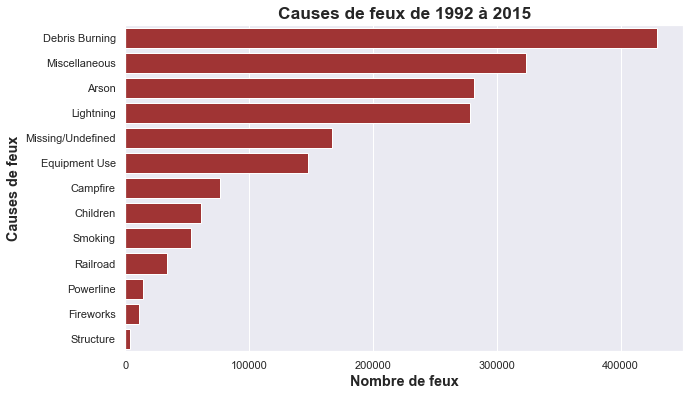

In [29]:
# Création d'un graphique en barre pour connaitre le nombre de causes de feux de 1992 à 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='STAT_CAUSE_DESCR', data = fires, order= fires['STAT_CAUSE_DESCR'].value_counts().index, color = 'firebrick')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Causes de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Causes de feux de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()


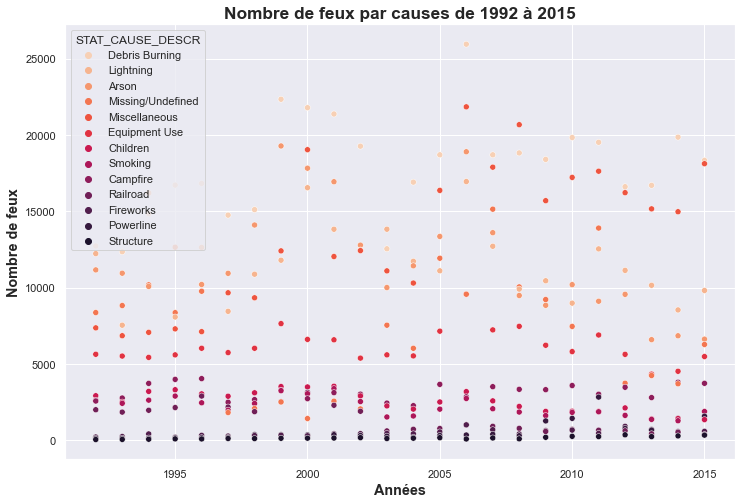

In [30]:
# Création d'un nuage de points montrant la répartition des causes de feux de 1992 à 2015
groupby_cause = fires.groupby(['FIRE_YEAR'], as_index = False)['STAT_CAUSE_DESCR'].value_counts()
sns.set({"figure.figsize":(12, 8)})
sns.scatterplot(x = 'FIRE_YEAR', y = 'count', hue = 'STAT_CAUSE_DESCR', data = groupby_cause, palette = 'rocket_r')
plt.xlabel('Années', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par causes de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Il y a 13 causes de feu répertoriées dans le dataset.

Voici le top 5 des causes de feu de forêt aux Etats-Unis entre 1992 et 2015 :
- Débris brûlant (22%)
- Divers (17.2%)
- Incendie criminel (15%)
- Eclair (14.8%)
- Données manquantes / non identifiées (8.9%)

Nous remarqons que la 2ème cause de feu appartient à la catégorie divers (on ne sait pas trop à quoi cela correspond) et la 5ème cause appartient à la catégorie données manquantes/non identifiées. Cela signifie qu'une grande partie de ces feux ne peut être expliquée.

Nous pouvons regarder quelles ont été les années les plus marquées par les feux de forêt

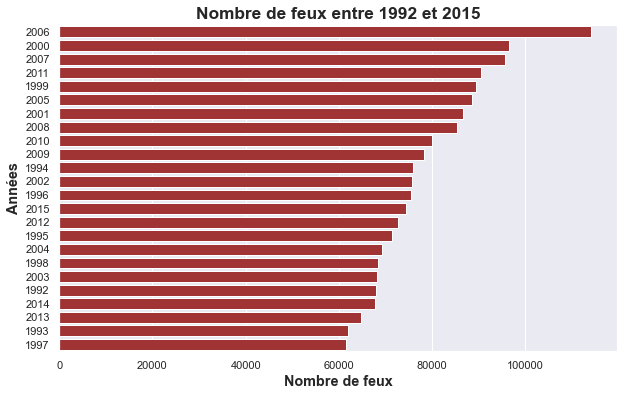

In [31]:
# Création d'un graphique en barre pour connaitre le nombre de feux par années entre 1992 et 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='FIRE_YEAR', data = fires, order= fires['FIRE_YEAR'].value_counts().index, color = 'firebrick')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Années', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux entre 1992 et 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Nous remarquons que l'année 2006 est nettement devant les autres années, suivie de l'année 2000 et 2007.  
Il est intéressant de comprendre pourquoi le nombre de feux est plus important durant l'année 2006.  

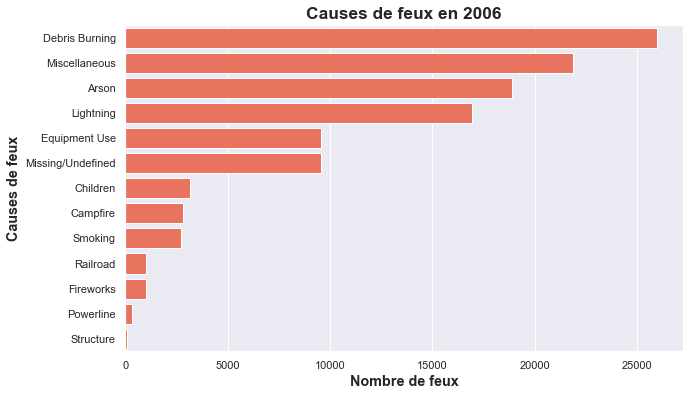

In [32]:
# Création d'un DataFrame uniquement pour l'année 2006
fires_analysis_2006 = fires[fires['FIRE_YEAR']==2006]
fires_analysis_2006['STAT_CAUSE_DESCR'].value_counts()

# Création d'un graphique en barre montrant les causes de feux en 2006
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='STAT_CAUSE_DESCR', data = fires_analysis_2006, order= fires_analysis_2006['STAT_CAUSE_DESCR'].value_counts().index, color = 'tomato')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Causes de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Causes de feux en 2006', fontsize = 'x-large', fontweight = 'bold')
plt.show()

On peut s'apercevoir que les causes les plus répandues en 2006 sont les débris brûlants, puis les causes diverses ainsi que les incendies criminels.  
C'est le même classement que pour l'ensemble du périmètre 1992 à 2015.  
On s'intéressera aux Etats et aux températures prochainement. A présent, nous allons regarder durant quels mois les feux de forêt de 2006 ont été 

A quel moment de l'année les feux de forêt sont-ils les plus probables ?

In [33]:
# Création des colonnes mois et jour
# La colonne mois correspond aux mois où les feux ont été découvert
fires['MONTH'] = pd.DatetimeIndex(fires['DATE']).month_name()
# La colonne jour correspond aux jours de la semaine où les feux ont été découvert
fires['DAY'] = fires['DATE'].dt.day_name()


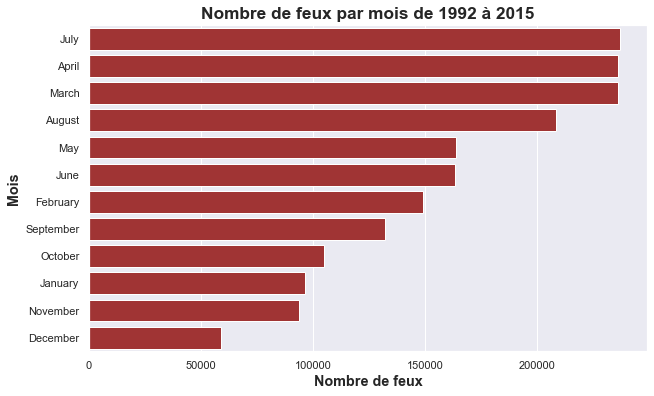

In [34]:
# Création d'un graphique en barre pour connaitre le nombre de de feux par mois de 1992 à 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='MONTH', data = fires, order= fires['MONTH'].value_counts().index, color = 'firebrick')
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Mois', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par mois de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

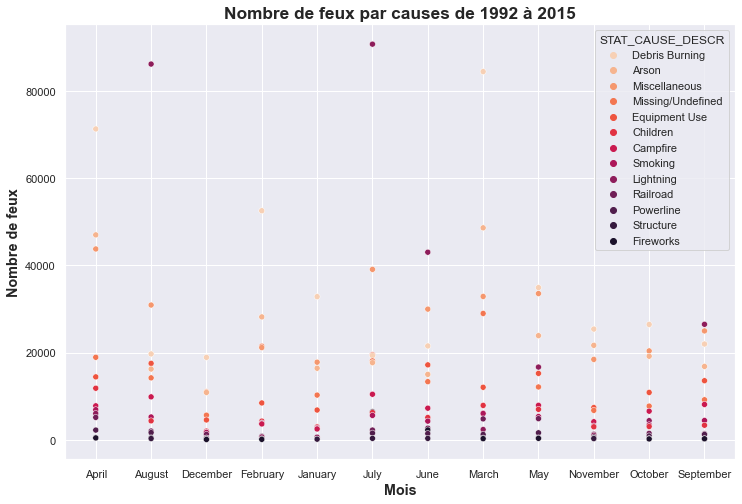

In [35]:
# Création d'un nuage de points montrant les causes de feux par mois de 1992 à 2015
groupby_month = fires.groupby(['MONTH'], as_index = False)['STAT_CAUSE_DESCR'].value_counts()
sns.set({"figure.figsize":(12, 8)})
sns.scatterplot(x = 'MONTH', y = 'count', hue = 'STAT_CAUSE_DESCR', data = groupby_month, palette = 'rocket_r')
plt.xlabel('Mois', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par causes de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Les mois où les feux de forêt sont les plus présents sont les mois de juillet, aout, avril et mars sur toute la période d'observation.  
Pour juillet et Aout la cause principale sont les éclairs qui sont très loin devant les feux d'artifices.  
En avril et en mars cela s'explique principalement par les débris brûlants.  
Il est intéressant de souligner qu'en aout les éclairs sont aussi la principale causes de feux de forêt.

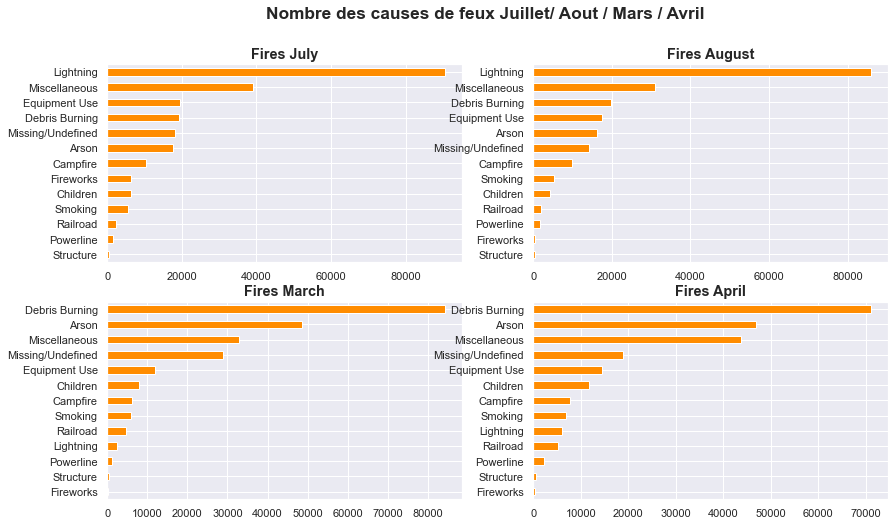

In [36]:
fig, ax = plt.subplots(2,2, figsize = (14, 8))
plt.suptitle('Nombre des causes de feux Juillet/ Aout / Mars / Avril', fontsize = 'x-large', fontweight = 'bold')


fires_July = fires[fires['MONTH'] == 'July']
fires_August = fires[fires['MONTH'] == 'August']
fires_March = fires[fires['MONTH'] == 'March']
fires_April = fires[fires['MONTH'] == 'April']

ax1 = plt.subplot(221) 
fires_July['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='darkorange',title='Fires July');
plt.title('Fires July', fontsize = 'large', fontweight = 'bold');

ax1 = plt.subplot(222) 
fires_August['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='darkorange',title='Fires August');
plt.title('Fires August', fontsize = 'large', fontweight = 'bold');

ax1 = plt.subplot(223) 
fires_March['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='darkorange',title='Fires March');
plt.title('Fires March', fontsize = 'large', fontweight = 'bold');

ax1 = plt.subplot(224) 
fires_April['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='darkorange',title='Fires August');
plt.title('Fires April', fontsize = 'large', fontweight = 'bold');

A quel moment de la semaine les feux de forêt sont-ils les plus probables ?

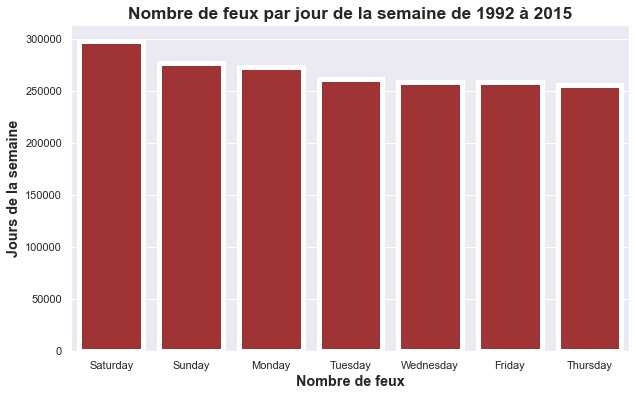

In [37]:
# Création d'un graphique en barre pour connaitre le nombre de de feux par jour de la semaine de 1992 à 2015
sns.set({"figure.figsize":(10, 6)})
sns.countplot(x='DAY', data = fires, order= fires['DAY'].value_counts().index, color = 'firebrick', linewidth = 5)
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Jours de la semaine', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par jour de la semaine de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()


Visiblement, les feux de forêt sont plus nombreux le samedi puis ensuite le dimanche et lundi.  
On peut supposer que les feux de forêts sont déclenchés par des personnes négligentes : feux de camp, cigarettes, incendies malveillants.  
Il est peu probable que les incendies apparaissant le week-end proviennent de causes naturelles.

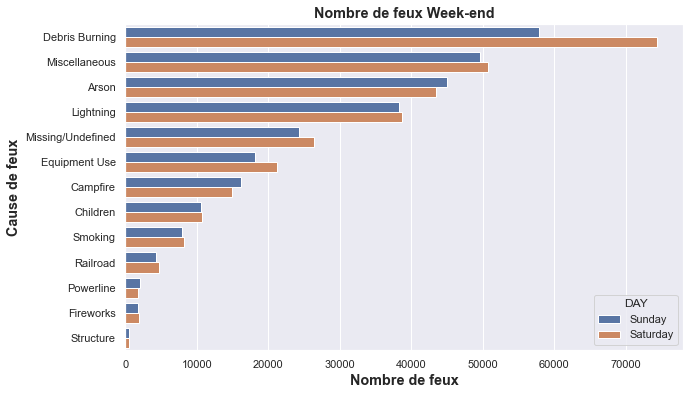

In [38]:
# Création d'un graphique en barre pour connaitre la cause de feux dans le week-end 
fires_weekend = fires[(fires['DAY']=='Saturday') | (fires['DAY']=='Sunday')]

sns.set({"figure.figsize":(10, 6)})
sns.countplot(y='STAT_CAUSE_DESCR', data = fires_weekend, hue= 'DAY', order= fires_weekend['STAT_CAUSE_DESCR'].value_counts().index);
plt.xlabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Cause de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux Week-end', fontweight = 'bold', fontsize = 'large');

Comme on imaginait, sur le week-end les feux de forêts sont déclenchés par des personnes négligentes. Notamment le Samedi, quand les gens sont plus susceptibles de sortir ce jour.

Par contre entre les jours de la semaine et le week-end, on ne voit pas une écart si significatif. 
Afin de le vérifier, on va checker la répartion de causes pour chaque jour.

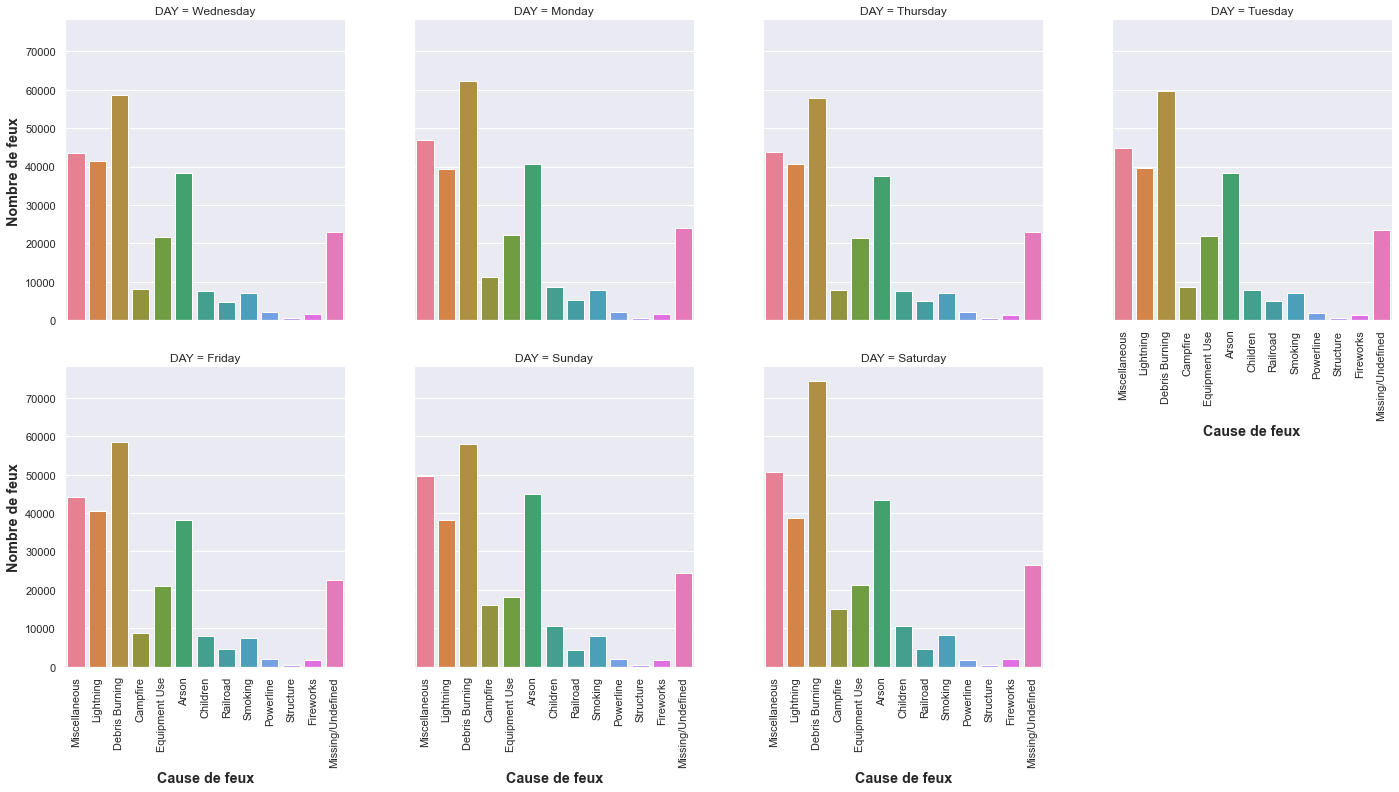

In [39]:
# Création de plusieurs graphiques pour connaitre la cause de feux vs les jours de la semaine

g=sns.catplot(x='STAT_CAUSE_DESCR', col='DAY', kind='count',  palette = 'husl', col_wrap=4, data = fires);
g.set_xticklabels(rotation=90); 

g.set_xlabels('Cause de feux', fontweight = 'bold', fontsize = 'large')
g.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large')

Même si sur le week-end on a plus d'incidence de feux (Debris Burning / Arson / Miscellaneous), les raisons des feux suivent la même tendance.

Ainsi, le week-end a un effet de croissance sur les causes d'incendies plus récurrents.

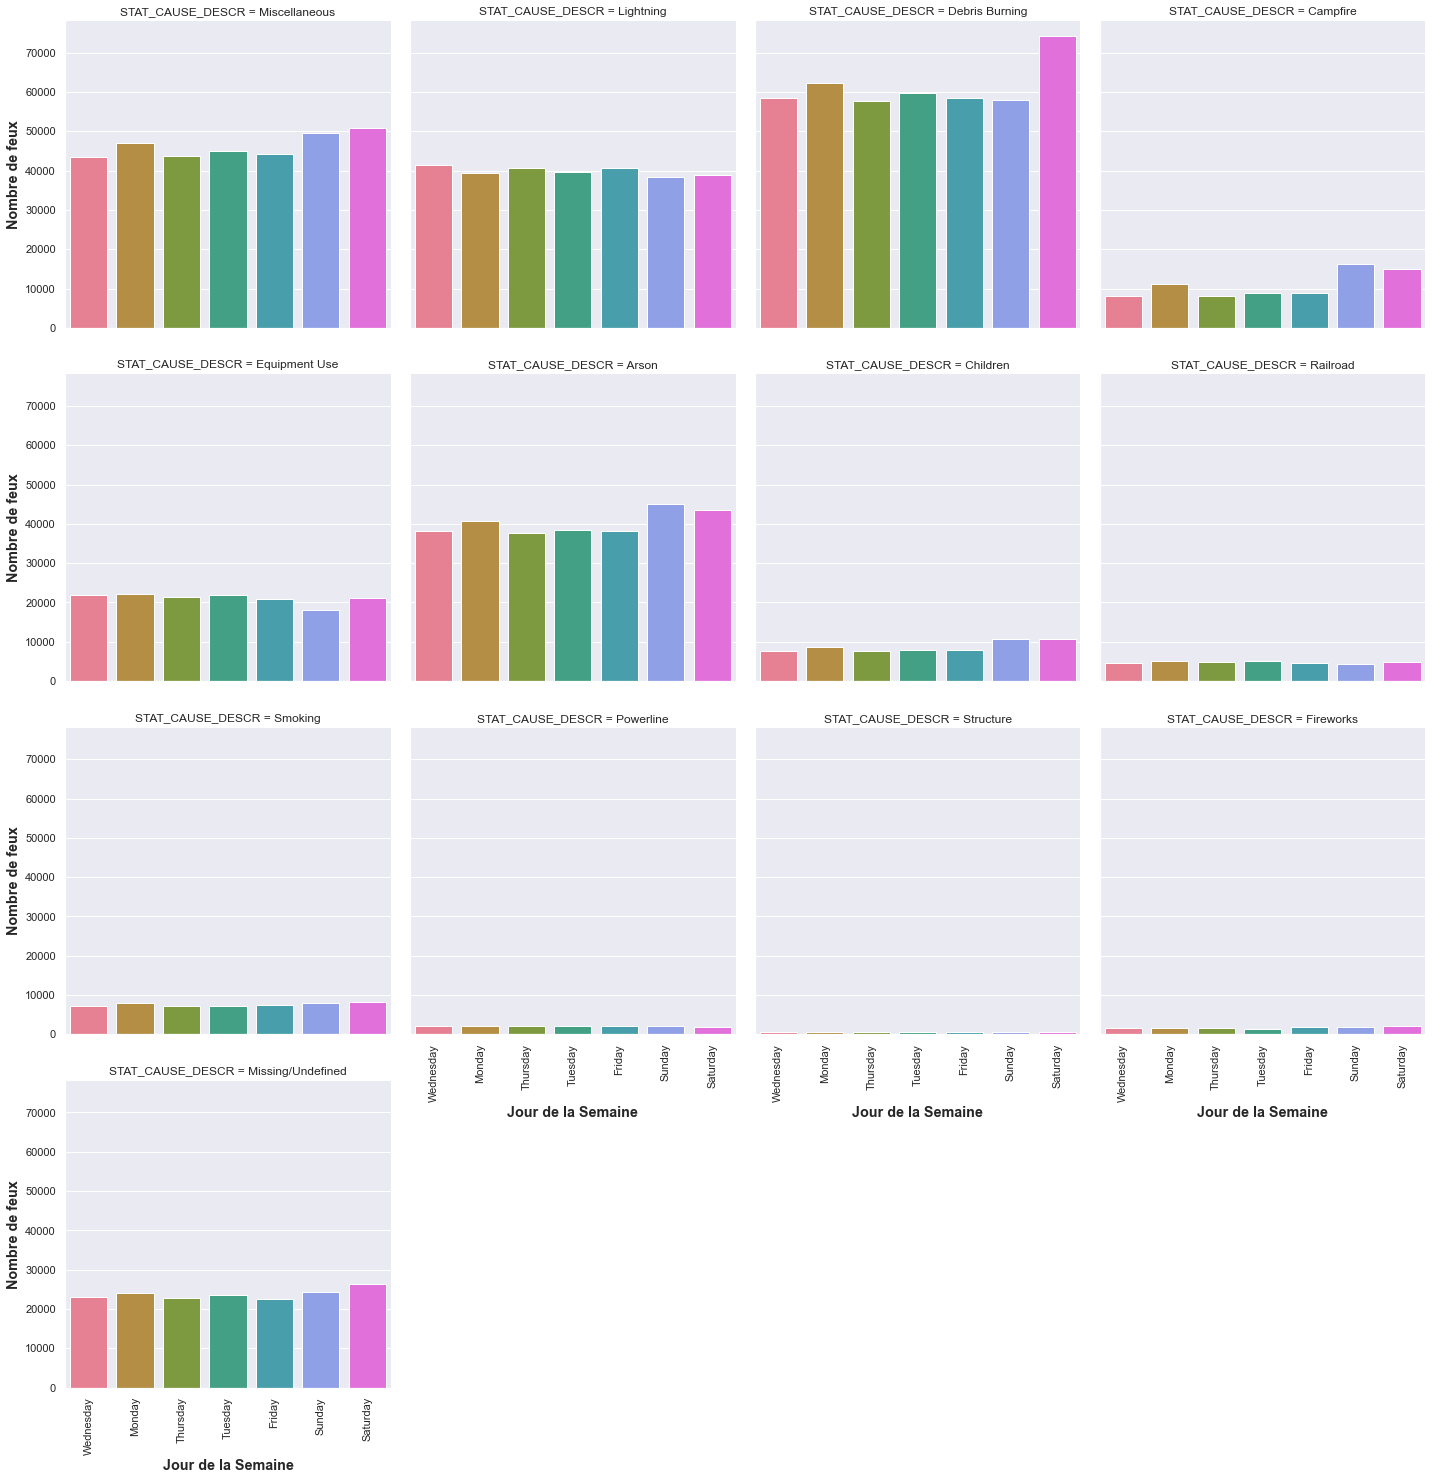

In [40]:
# Création de plusieurs graphiques pour voir les jours de la semaine vs la cause de feux

g=sns.catplot(x='DAY', col='STAT_CAUSE_DESCR', kind='count',  palette = 'husl', col_wrap=4, data = fires);
g.set_xticklabels(rotation=90); 

g.set_xlabels('Jour de la Semaine', fontweight = 'bold', fontsize = 'large');
g.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large');

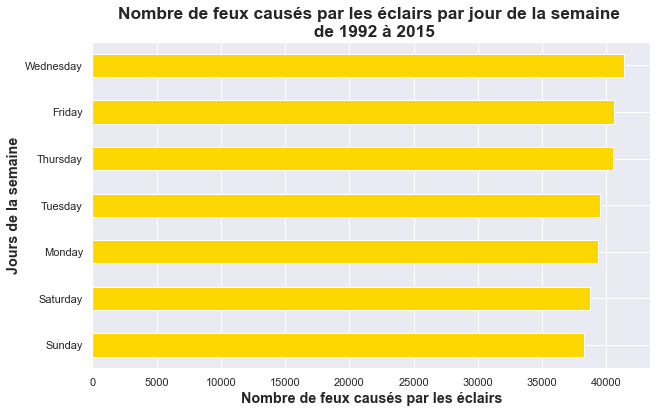

In [41]:
# Création d'un graphique en barre pour connaitre le nombre de de feux déclenchés par les éclairs par jour de la semaine de 1992 à 2015
fires_lightning = fires[fires['STAT_CAUSE_DESCR']=='Lightning']
fires_lightning['DAY'].value_counts().sort_values().plot(kind='barh',color='gold')
plt.xlabel('Nombre de feux causés par les éclairs', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Jours de la semaine', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux causés par les éclairs par jour de la semaine \n de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Il y a de très légères variations, mais nous voyons que les feux causés par les éclairs se déclenchent moins le week-end.  
Nous pouvons examiner si l'augmentation des feux de forêt le week-end est due à des incendies malveillants.

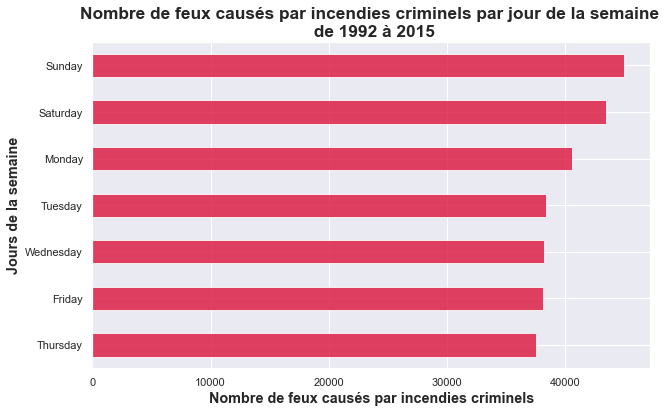

In [42]:
# Création d'un graphique en barre pour connaitre le nombre de de feux déclenchés par incendies criminels par jour de la semaine de 1992 à 2015
fires_arson = fires[fires['STAT_CAUSE_DESCR']=='Arson']
fires_arson['DAY'].value_counts().sort_values().plot(kind='barh',color='crimson', alpha = 0.8)
plt.xlabel('Nombre de feux causés par incendies criminels', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Jours de la semaine', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux causés par incendies criminels par jour de la semaine \n de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Cela montre une tendance plus significative.  
Les incendies criminels sont plus probables le week-end que pendant la semaine, cela représente une augmentation d'environ 30 % de la moyenne des jours de la semaine. 


Quels États ont le plus d'incendies ? (pour éviter un trop grand nombre de données, nous pouvons nous concentrer sur les dix premiers)

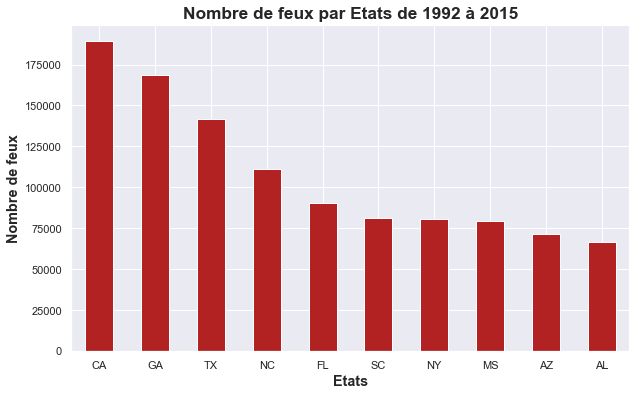

In [43]:
# Création d'un graphique en barre pour connaitre le nombre de de feux déclenchés par Etats de 1992 à 2015
top10_states_fire = fires['STATE'].value_counts().sort_values(ascending = False)

top10_states_fire.head(10).plot(kind='bar',color='firebrick')
plt.xlabel('Etats', fontweight = 'bold', fontsize = 'large')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par Etats de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()


Les 6 derniers Etats ont relativement le même ordre de grandeur de feux de forêt et la Caroline du Nord reste derrière les 3 premiers Etats.  
Nous pouvons nous concentrer sur les 3 premiers Etats qui sont la Californie, la Georgie et le Texas.

La Californie et le Texas sont de grands états avec des climats secs et subtropicaux. Le Texas a également des zones arides. En revanche, la Géorgie a un climant plutôt méditerranéen et continental. On peut se demander pourquoi cet Etat est en 2ème position.  
Nous pouvons enquêter sur les causes des incendies dans ces 3 états.

In [44]:
# Création des 3 DataFrames pour les 3 Etats
fires_CA = fires[fires['STATE']=='CA']
fires_GA = fires[fires['STATE']=='GA']
fires_TX = fires[fires['STATE']=='TX']

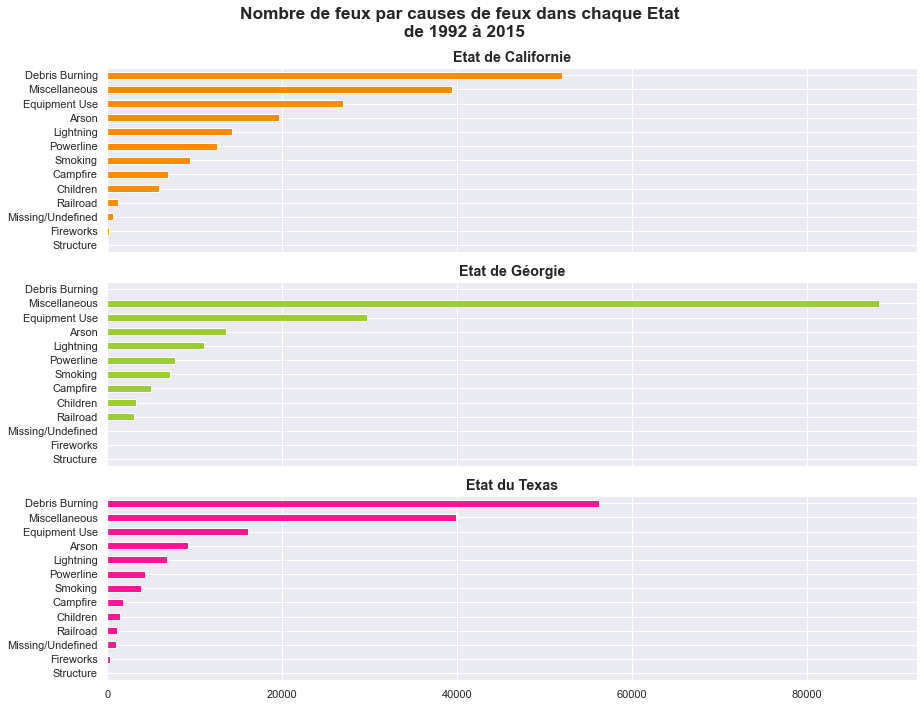

In [45]:
# Création des 3 sous-graphiques pour les 3 Etats
fig, ax = plt.subplots(3,1, figsize = (13, 10))
plt.suptitle('Nombre de feux par causes de feux dans chaque Etat \n de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')


ax1 = plt.subplot(311) 
fires_CA['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='darkorange',title='causes of fires for CA')
plt.title('Etat de Californie', fontsize = 'large', fontweight = 'bold')

ax2 = plt.subplot(312, sharex=ax1, sharey = ax1) 
fires_GA['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='yellowgreen',title='causes of fires for GA')
plt.title('Etat de Géorgie', fontsize = 'large', fontweight = 'bold')

ax3 = plt.subplot(313, sharex=ax1, sharey = ax1) 
fires_TX['STAT_CAUSE_DESCR'].value_counts().sort_values().plot(kind='barh',color='deeppink',title='causes of fires for TX')
plt.title('Etat du Texas', fontsize = 'large', fontweight = 'bold')

fig.tight_layout()
plt.show()

Nous voyons que pour les Etats de Californie et du Texas l'ordre des causes est la même et le nombre de feux est sensiblement du même ordre de grandeur.  
Pour l'Etat de Géorgie c'est différent. La première cause d'incendie dépasse de près de 50% celle des 2 autres Etats et fait partie de la catégorie divers. Autrement dit, le nombre de feux n'est ni lié à des causes naturelles ni à des incendies criminels répertoriés dans le dataset.

In [46]:
# Création d'un DataFrame avec uniquement les 3 Etats
top_3_state = fires[(fires.STATE == 'CA') | (fires.STATE == 'GA') | (fires.STATE == 'TX')]

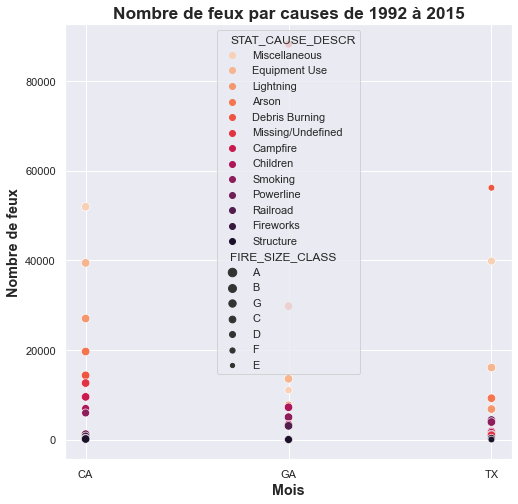

In [47]:
# !!!!! A COMPLETER !!!!!!!!
groupby_top_3_state = top_3_state.groupby(['STATE'], as_index = False)['STAT_CAUSE_DESCR'].value_counts()
sns.set({"figure.figsize":(8,8)})
sns.scatterplot(x = 'STATE', y = 'count', hue = 'STAT_CAUSE_DESCR', size = fires['FIRE_SIZE_CLASS'], data = groupby_top_3_state, palette = 'rocket_r')
plt.xlabel('Mois', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux par causes de 1992 à 2015', fontsize = 'x-large', fontweight = 'bold')
plt.show()

Il serait intéressant d'examiner les incendies par Cause vs Taille vs States enregardant la moyenne et somme afin de pouvoir cibler l'analyse sur certains états. 

Y a-t-il une rélation entre ces variables?

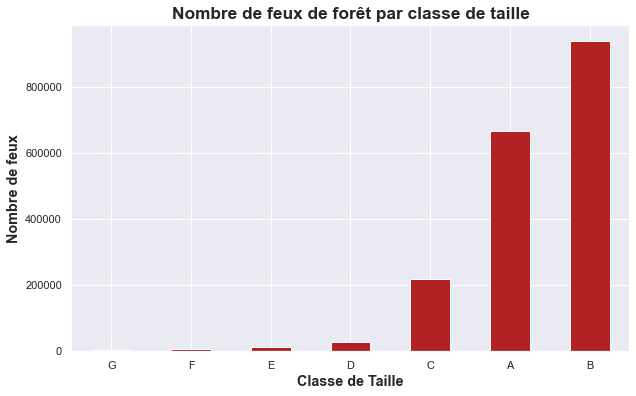

In [48]:
# Nombre de feux de forêt par classe de taille

sns.set({"figure.figsize":(10, 6)})
fires['FIRE_SIZE_CLASS'].value_counts().sort_values(ascending = True).plot(kind='bar',color='firebrick')
plt.xlabel('Classe de Taille', fontweight = 'bold', fontsize = 'large')
plt.xticks(rotation = 'horizontal')
plt.ylabel('Nombre de feux', fontweight = 'bold', fontsize = 'large')
plt.title('Nombre de feux de forêt par classe de taille', fontsize = 'x-large', fontweight = 'bold')
plt.show()

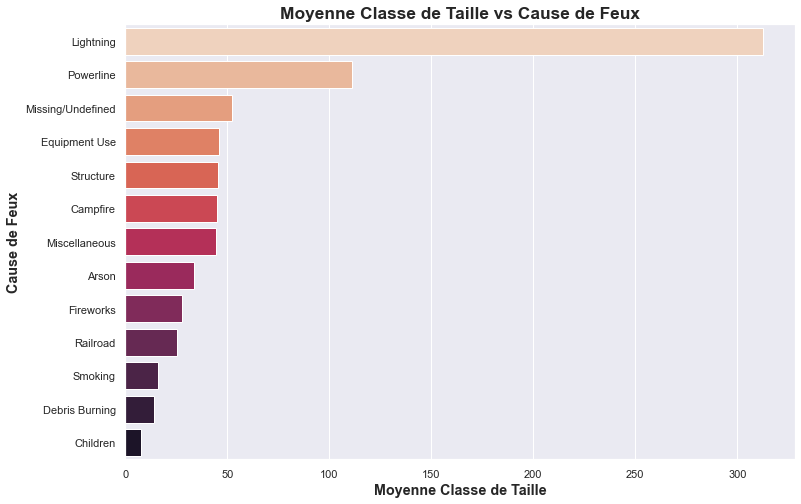

In [49]:
# Création d'un graphique pour vérifier la classe de taille moyenne par Cause 

groupby_size_cause = fires.groupby(['STAT_CAUSE_DESCR'], as_index = False)['FIRE_SIZE'].mean()


sns.set({"figure.figsize":(12, 8)})
sns.barplot(x = 'FIRE_SIZE', y = 'STAT_CAUSE_DESCR', data = groupby_size_cause.sort_values(by='FIRE_SIZE', ascending=False), palette = 'rocket_r')
plt.xlabel('Moyenne Classe de Taille', fontweight = 'bold', fontsize = 'large')
plt.ylabel('Cause de Feux', fontweight = 'bold', fontsize = 'large')
plt.title('Moyenne Classe de Taille vs Cause de Feux', fontsize = 'x-large', fontweight = 'bold')
plt.show()

En moyenne, les feux qui se déclenchent électriquement ((naturellement ou par action humaine) sont les plus dangereux et donc susceptibles de se propager.

Ci-dessous l'objectif c'est de vérifier en quantité totale les plus grandes zones de feu pour ce états.

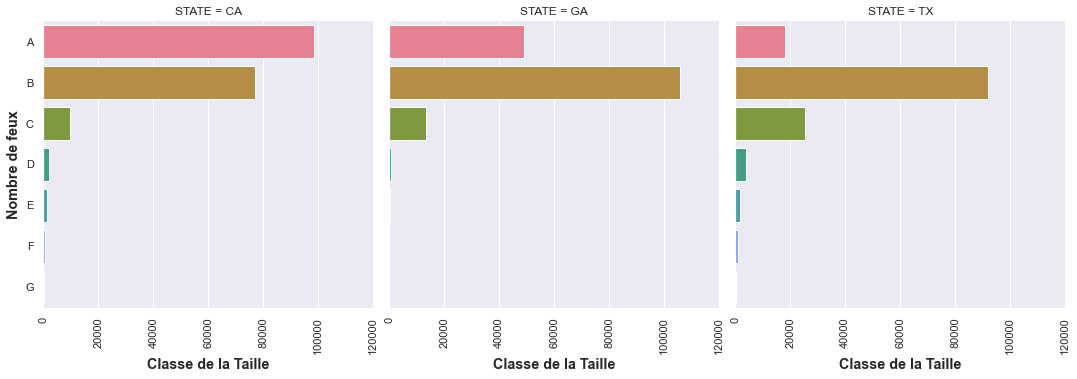

In [50]:
# Création d'un graphique pour vérifier le nombre d'occurrance vs classe de Taille sur les états top 3

groupby_size_state = top_3_state.groupby(['STATE', 'FIRE_SIZE_CLASS'], as_index = False)['STATE'].value_counts()

ax=sns.catplot(x='count', y='FIRE_SIZE_CLASS', col='STATE', kind='bar',  palette = 'husl', col_wrap=3, data = groupby_size_state);
ax.set_xticklabels(rotation=90); 

ax.set_xlabels('Classe de la Taille', fontweight = 'bold', fontsize = 'large');
ax.set_ylabels('Nombre de feux', fontweight = 'bold', fontsize = 'large');

Ce qui est intéressant ici, c'est que la Californie, le top 1 en nombre d'incendies, a aussi le plus grand nombre de petits incendies, on peut donc supposer que l'action humaine est plus forte car 'Debris Burning, Miscellanious, Equipament Use et Arson' sont la principale cause des incendies.

A la Géorgie et au Texas, les feux se propagent dans une zone plus élevée (catégorie B), les raisons restent plutôt également par action humaine, par contre les feux dans ces états se propagent plus rapidement.

A titre d'information 1 acre = 4046 m2, soit 60% d'un terrain de football ou l'équivalent de 16 terrain de tennis.

Donc la grandeur d'un feu de catégorie B n'est pas négligeable.